In [14]:
pip install pandas numpy matplotlib seaborn scikit-learn nltk 

Note: you may need to restart the kernel to use updated packages.


In [ ]:
1. Load the Data

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv('IMDB Dataset.csv')

# Quick check
print(df.head())
print(df['sentiment'].value_counts())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [ ]:
Sentiment Distribution (Bar Chart)
Gives a visual feel of most frequent words by sentiment.

C:\Users\HP\AppData\Local\Temp\ipykernel_18396\477016742.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


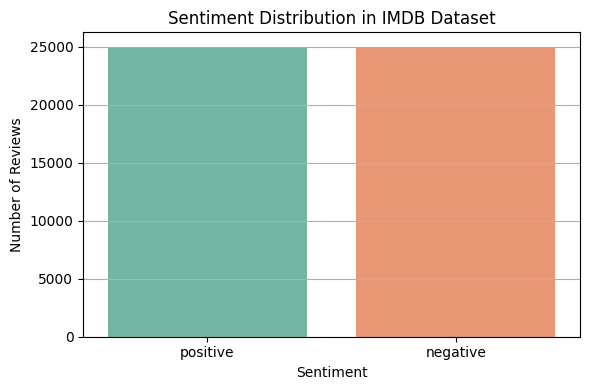

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("IMDB Dataset.csv")

# Plot sentiment counts
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution in IMDB Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
Review Length Distribution
To see if review lengths differ across sentiments.

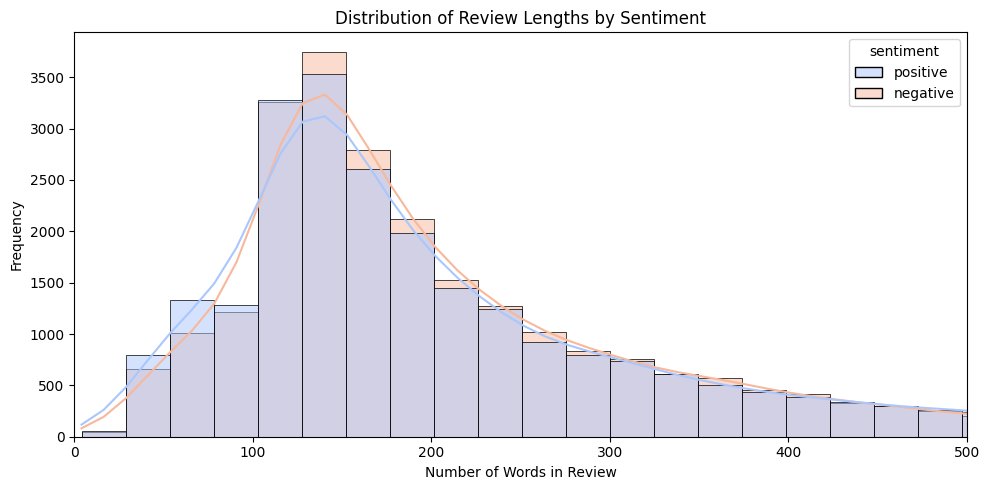

In [27]:
# Add a column for review length
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=100, kde=True, palette='coolwarm')
plt.title("Distribution of Review Lengths by Sentiment")
plt.xlabel("Number of Words in Review")
plt.ylabel("Frequency")
plt.xlim(0, 500)
plt.tight_layout()
plt.show()

In [ ]:
2. Text Preprocessing
Using nltk to clean the reviews:

In [9]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    text = re.sub('<.*?>', '', text)                  # Remove HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)             # Keep letters only
    text = text.lower().split()                       # Lowercase and tokenize
    text = [ps.stem(w) for w in text if w not in stop_words]  # Stemming and stopword removal
    return ' '.join(text)

df['clean_review'] = df['review'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
print(df.head())

                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        clean_review  
0  one review mention watch oz episod hook right ...  
1  wonder littl product film techniqu unassum old...  
2  thought wonder way spend time hot summer weeke...  
3  basic famili littl boy jake think zombi closet...  
4  petter mattei love time money visual stun film...  


In [ ]:
4. Data Cleaning & Preprocessing
Use progress messages or tqdm to show steps happening:

In [15]:
from tqdm import tqdm
tqdm.pandas()

df['clean_review'] = df['review'].progress_apply(clean_text)

100%|█████████████████| 50000/50000 [01:04<00:00, 771.93it/s]


In [16]:
df[['review', 'clean_review']].head()

,review,clean_review
0,One of the other reviewers has mentioned that ...,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visual stun film...


In [ ]:
5. Label Encoding
Convert sentiment to numerical:

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])  # positive:1, negative:0

In [ ]:
6. Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split

X = df['clean_review']
y = df['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
7. Text Vectorization
Using TF-IDF for classic ML:

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
8. Modeling (Logistic Regression)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8863
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
9. Visualization

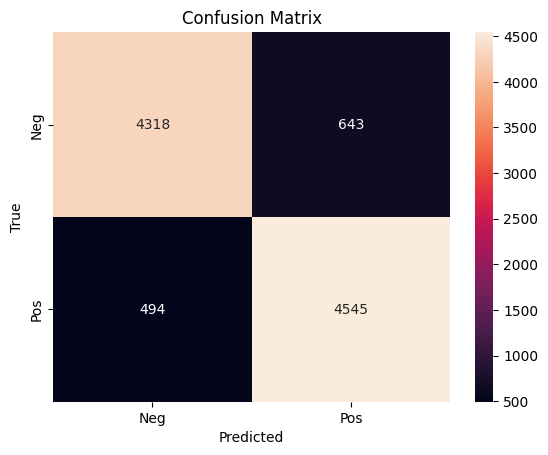

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()